In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

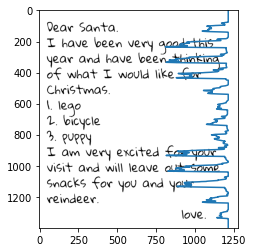

[[77, 140], [182, 240], [276, 340], [370, 441], [485, 540], [596, 640], [680, 740], [778, 782], [796, 861], [871, 876], [882, 954], [982, 1040], [1071, 1079], [1080, 1084], [1087, 1154], [1195, 1240], [1296, 1340]]


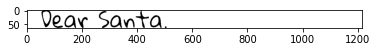

In [2]:
img = cv2.imread("img/letter-to-santa-claus.png", cv2.IMREAD_GRAYSCALE)

#binary image
bin = np.copy(img)
treshold = 32
bin[bin<=treshold] = 0
bin[bin>treshold] = 255

#make horizontal hist
horizontal_hist = np.sum(bin,axis=1,keepdims=True)/255

fig, ax1 = plt.subplots()

ax1.imshow(bin,"gray")
ax1.plot(horizontal_hist,range(np.shape(horizontal_hist)[0]))
plt.show()

img_cut = np.copy(bin)
row, col = np.shape(img_cut)

for i in range(row):
    if horizontal_hist[i][0] >1200:
        for j in range(col):
            img_cut[i][j] = 0

plt.imshow(np.concatenate((img_cut,bin),axis=1), "gray")

line_segments = list()
start = False
i1, i2 = 0, 0
for i in range(row):
    if horizontal_hist[i][0] < 1200:
            if start == False:
                i1, start = i , True
    else:
        if start:
            i2, start = i,  False
            line_segments.append([i1,i2])

print(line_segments)

#clean up
for line in line_segments:
    if line[1]-line[0]<10:
        line_segments.remove(line)

cut_parts = list()
r, c = np.shape(line_segments)

for i in range(r):
    cut_parts.append(bin[line_segments[i][0]:line_segments[i][1]:])

line = cut_parts[0]
plt.imshow(line, "gray")


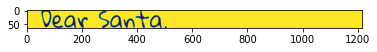

In [3]:
plt.imshow(line)

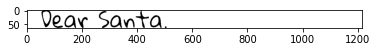

In [4]:
plt.imshow(line,"gray")
plt.savefig("first_line.png")

In [5]:
print(np.shape(line))

(63, 1215)


In [6]:
i = cv2.imread("first_line.png",cv2.IMREAD_GRAYSCALE)
print(np.shape(i))

(288, 432)


In [7]:
vertical_hist = np.sum(line,axis=0,keepdims=True)/255
print(np.shape(vertical_hist))

(1, 1215)


In [8]:
v= list()
for i in range(1215):
    v.append(vertical_hist[0][i])

In [9]:
print(np.shape(v))

(1215,)


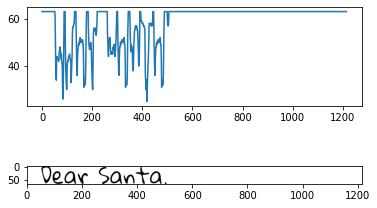

In [10]:
plt.subplot(211)
plt.plot(v)
plt.subplot(212)
plt.imshow(line, "gray")
plt.savefig("split_word_sym.png")

In [11]:
word_segments = list()
start = False
i1, i2 = 0, 0
for i in range(np.shape(line)[1]):
    if vertical_hist[0][i] > 60:
            if start == False:
                i1, start = i , True
            elif start and i == np.shape(line)[1]-1:
                i2, start = i,  False
                word_segments.append([i1,i2])

    else:
        if start:
            i2, start = i,  False
            word_segments.append([i1,i2])

print(word_segments)

#clear
remove_indexs=list()
for i in range(np.shape(word_segments)[0]):
    if word_segments[i][1]-word_segments[i][0]<40:
        remove_indexs.append(i)
remove_indexs = remove_indexs[::-1]

for i in remove_indexs:
    word_segments.remove(word_segments[i])
print(word_segments)

word_segments_cut = list()

for i in range(len(word_segments)-1):
    word_segments_cut.append([word_segments[i][1],word_segments[i+1][0]])

print(word_segments_cut)

cut_parts = list()
r,c = np.shape(line)
# print(r,c)

for k in range(np.shape(word_segments_cut)[0]):
    l1 = list()
    for i in range(r):
        l2=list()
        for j in range(c):
            if j >= word_segments_cut[k][0] and j<= word_segments_cut[k][1]:
                l2.append(line[i][j])
        l1.append(l2)
    cut_parts.append(l1)


[[0, 53], [88, 93], [130, 136], [178, 185], [220, 261], [298, 302], [344, 351], [390, 395], [442, 446], [488, 500], [506, 1214]]
[[0, 53], [220, 261], [506, 1214]]
[[53, 220], [261, 506]]
63 1215


/home/petar/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


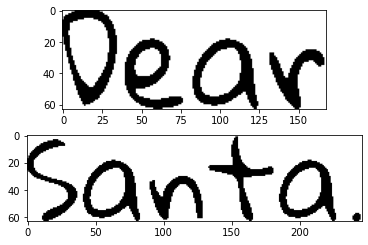

In [12]:
fig, axes = plt.subplots(nrows = np.shape(cut_parts)[0])
for i in range(np.shape(cut_parts)[0]):
    axes[i].imshow(cut_parts[i], "gray")